In [13]:
import numpy as np
import collections
import pandas as pd

from glob import glob

from seerdata import loadIncidenceFile, loadPopulationFile, random_subset




path = 'incidence/yr2005.lo_2nd_half/BREAST.TXT'
incidences = glob('incidence/*/*.TXT')
path = incidences[0].replace('TXT', 'SUB')

random_subset(incidences[0], path)
#path = incidences[0]
#populationFiles = glob("populations/*/*/*.txt")

print("loading incidence files", path)
data=loadIncidenceFile(path)
print("loaded", len(data['Registry ID']), "records from", path)

#print("..loaded some table from seerdata..")
#print(data.keys())

#path='populations/expanded.race.by.hispanic/yr2005.lo_2nd_half/19agegroups.txt'
#print(path)
#pop = loadPopulationFile(path)
#print(pop.keys())

loading incidence files incidence\yr1973_2013.seer9\BREAST.SUB


loaded 10000 records from incidence\yr1973_2013.seer9\BREAST.SUB


average age at diagnosis 61.6196


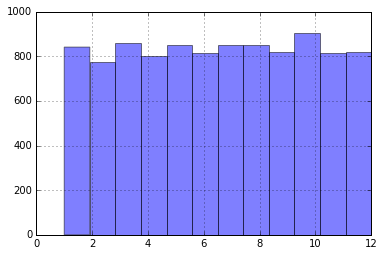

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
month=data['Month of diagnosis']
month.hist(alpha=0.5, bins=12)
"""
play with Kernels
see 
"""
print("average age at diagnosis",data['Age at diagnosis'].mean())

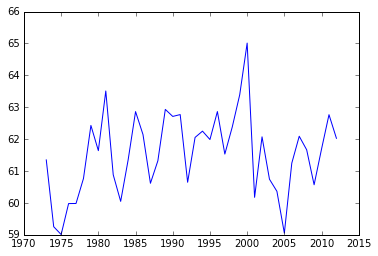

In [15]:
series= [ [year, np.mean( data['Age at diagnosis'][data['Year of diagnosis'] == year])] for year in range(1973, 2013)]
series=np.array(series)

plt.figure()
plt.plot(series[:,0], series[:,1])

In [12]:
validFields= []
for field in data.keys():
    try:
        Not_A_Number_Total=np.isnan(data[field]).sum()
        if Not_A_Number_Total>10:
            print(field, Not_A_Number_Total)
        else:
            validFields.append(field)
    except TypeError:
        print(field, "is not a numeric field check differently")
        validFields.append(field)

print(len(validFields), "fully documented fields:\n", validFields)

Primary Site is not a numeric field check differently
EOD-Tumor Size 5668
EOD-Extension 5668
EOD-Extension Prost Path 10000
EOD-Lymph Node Involv 5668
Regional Nodes Positive 2281
Regional Nodes Examined 2281
EOD-Old 13 Digit is not a numeric field check differently
EOD-Old 2 Digit is not a numeric field check differently
EOD-Old 4 Digit 9030
Coding System for EOD 3387
Tumor Marker 1 3387
Tumor Marker 2 3387
Tumor Marker 3 3387
CS Tumor Size 6613
CS Extension 6613
CS Lymph Nodes 6613
CS Mets at Dx 6613
CS Site-Specific Factor 1 6613
CS Site-Specific Factor 2 6613
CS Site-Specific Factor 3 6613
CS Site-Specific Factor 4 6613
CS Site-Specific Factor 5 6613
CS Site-Specific Factor 6 6613
CS Site-Specific Factor 25 6613
Derived AJCC T 6613
Derived AJCC N 6613
Derived AJCC M 6613
Derived AJCC Stage Group 6613
Derived SS1977 6613
Derived SS2000 6613
Derived AJCC-Flag 6613
CS Version Input Original 6613
CS Version Derived 6613
CS Version Input Current 6613
RX Summ-Surg Prim Site 4695
RX Summ-

# 2016-12-06

* Directions to explore:

+ Data cleanup: 
Many fields are not complete for various reasons, do we try to complete them ? remove incomplete records ? split into sub datasets
 
+ exploratory datasets : 
10k lines long snapshots of the files.
done function random_subset

+ relapse:
patients listed several times in a file ? across files ??